<a href="https://colab.research.google.com/github/cedricbansah/new-york-housing-eda/blob/master/ny_housing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the dataset

data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [3]:
data.info()   #get summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#  select the necessary features for model

df = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
df.head()

,neighbourhood_group,neighbourhood,room_type,price
0,Brooklyn,Kensington,Private room,149
1,Manhattan,Midtown,Entire home/apt,225
2,Manhattan,Harlem,Private room,150
3,Brooklyn,Clinton Hill,Entire home/apt,89
4,Manhattan,East Harlem,Entire home/apt,80


In [8]:
df.describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [52]:
price = pd.Series(df['price'])
price.head(10)

0    149
1    225
2    150
3     89
4     80
5    200
6     60
7     79
8     79
9    150
Name: price, dtype: int64

In [57]:
from scipy import stats
z = np.abs(stats.zscore(df['price']))
print(z)

[0.01549307 0.30097355 0.01132904 ... 0.15707024 0.4069123  0.2611711 ]


In [10]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
manhattan_df = df[df['neighbourhood_group'] == 'Manhattan']
brooklyn_df = df[df['neighbourhood_group'] == 'Brooklyn']
bronx_df = df[df['neighbourhood_group'] == 'Bronx']
queens_df = df[df['neighbourhood_group'] == 'Queens']
staten_df = df[df['neighbourhood_group'] == 'Staten Island']  

In [31]:
def count_values(data, column):
  vc = data[column].value_counts()
  count_plot = sns.countplot(data[column])
  return vc 
  return count_plot

Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64

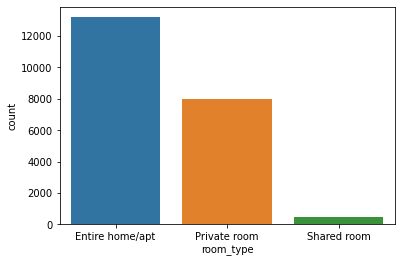

In [32]:
count_values(data=manhattan_df, column='room_type')

Private room       10132
Entire home/apt     9559
Shared room          413
Name: room_type, dtype: int64

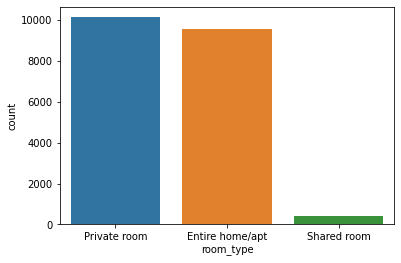

In [33]:
count_values(data=brooklyn_df, column='room_type')

Private room       3372
Entire home/apt    2096
Shared room         198
Name: room_type, dtype: int64

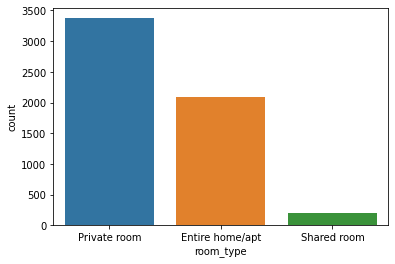

In [34]:
count_values(data=queens_df, column='room_type')

Private room       652
Entire home/apt    379
Shared room         60
Name: room_type, dtype: int64

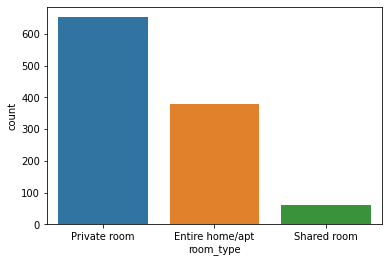

In [35]:
count_values(data=bronx_df, column='room_type')

Private room       188
Entire home/apt    176
Shared room          9
Name: room_type, dtype: int64

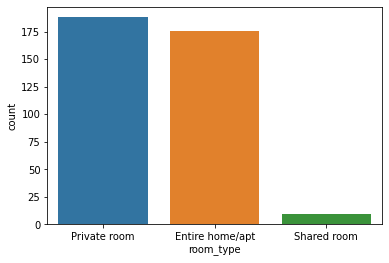

In [36]:
count_values(data=staten_df, column='room_type')